In [2]:
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
#import rasterio as rio
#from rasterio.plot import plotting_extent
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
import xarray as xr
#import cartopy.crs as ccrs
import pandas as pd

### LUCC analaysis


In [3]:
import xarray as xr

In [4]:
#reading data
data_2003 = xr.open_dataset("LsAI_EX/LUC_SAf_2003.nc")
data_2019=xr.open_dataset("LsAI_EX/LUC_SAf_2019.nc")

In [5]:
lats = data_2003.variables["lat"][:]
lons = data_2003.variables["lon"][:]
time = data_2003.variables["time"][:]
lucc_2003 = data_2003.variables["lccs_class"][0,:,:]

In [6]:
lats = data_2019.variables["lat"][:]
lons = data_2019.variables["lon"][:]
time = data_2019.variables["time"][:]
lucc_2019 = data_2019.variables["lccs_class"][0,:,:]

In [7]:
#changing conditions of ipcc classification
x=lucc_2003
conditions = [x <=40 , (x > 40) & (x <= 100), x == 160,x==170,(x>=110) & (x<=130),x==190,x==180,(x>=120) & (x<=122),
             x==140,(x>=150)& (x<=153),(x>=150)& (x<=153),(x<=200) &(x<=202),x==210]
choices = [1, 2, 2,2,3,4,5,6,6,6,6,6,6]
res_2003 = np.select(conditions, choices)
res_2003

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

In [8]:
y2=lucc_2019
conditions = [y2 <=40 , (y2 > 40) & (y2 <= 100), y2 == 160,y2==170,(y2>=110) & (y2<=130),y2==180,y2==190,(y2>=120) & (y2<=122),
             y2==140,(y2>=150)& (y2<=153),(y2>=150)& (y2<=153),(y2<=200) &(y2<=202),y2==210]
choices = [1, 2, 2,2,3,4,5,6,6,6,6,6,6]

res_2019 = np.select(conditions, choices)
res_2019

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

In [7]:
occurrences = np.count_nonzero(res_2003 == 6)
print(occurrences)

2327254


In [9]:
cmaps=ListedColormap(['#7cfc00', '#006400','#20b2aa','#0000ff','#8b0000','#6f6f6f'])
leg_lev = {"Agriculture":'#7cfc00',"Forest":'#006400',"Grassland":'#20b2aa',"Wetland":'#0000ff',
           "Settlement":'#8b0000',"Other":'#6f6f6f'}

# Define a normalization from values -> colors
norms = colors.BoundaryNorm([1,2,3,4,5,6,7],7)
norms

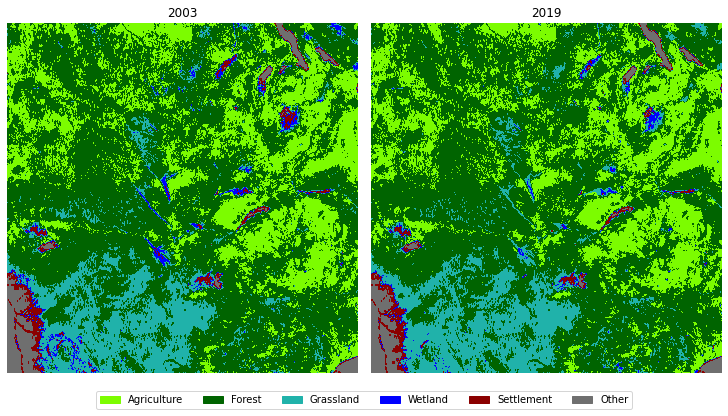

In [10]:
#plotting 
#%matplotlib
#%matplotlib inline
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,10),constrained_layout=True)

ax1.imshow(res_2003,cmap=cmaps,norm=norms,extent=[14,34,-6,-26])
ax1.axis("off")
ax1.set_title("2003")
ax2.imshow(res_2019,cmap=cmaps,norm=norms,extent=[14,34,-6,-26])
ax2.axis("off")
ax2.set_title("2019")
#plt.gca()
#ax.set_xticks(np.arange(14, 34, 6))
#ax.set_yticks(np.arange(-26, -6, 6))
#ax.set_xticklabels(np.arange(14, 34, 5))
#ax.set_yticklabels(np.arange(-26,-6, 5))
#ax.set_title("2003")
#cbar=ep.colorbar(chm_plot)

# Scale color bar to the height of the plot
#cbar = ep.colorbar(chm_plot)

patches = [Patch(color=label, label=color)
           for color, label in leg_lev.items()]


fig.legend(handles=patches,
           ncol=6,
           loc=8,
           bbox_to_anchor=(.5,.2),
          facecolor="white")


#boundary_means = [[norm.boundaries[ii]]
                  #for ii in range(1, len(norm.boundaries))]

#cbar.set_ticks(boundary_means)
#cbar.set_ticklabels(leg)

#ax.set_axis_off()
plt.show()
#plt.savefig("figures/lucc_final.jpg",dpi=150)


In [21]:
hist_2019=np.histogram(res_2019,bins=[0,1,2,3,4,5,6,7])
hist_2003 = np.histogram(res_2003,bins=[0,1,2,3,4,5,6,7])

(array([    3917,  5810380, 23065225, 19671700,    41400,   920124,
         2327254], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7]))

In [25]:
bin_color = ['#7cfc00','#006400','#20b2aa','#0000ff','#8b0000','#6f6f6f']
values = [5810380,23065225,19671700,41400,920124,2327254]
values1 = [5855435,23269356,19505561,942456,87482,2175880]
lev = ["Agriculture","Forest","Grassland","Wetland",
           "Settlement","Other"]
bar_data_03 = pd.DataFrame({"lucc_2003":values,"Year":2003,'types':lev})
bar_data_19 = pd.DataFrame({"lucc_2003":values1,"Year":2019,'types':lev})
bar_data_03['percentage'] =(bar_data_03['lucc_2003']/sum(bar_data_03["lucc_2003"]))*100
bar_data_19['percentage'] =(bar_data_19['lucc_2003']/sum(bar_data_19["lucc_2003"]))*100
dfx = [bar_data_03,bar_data_19]
bar_data = pd.concat(dfx,ignore_index=True)

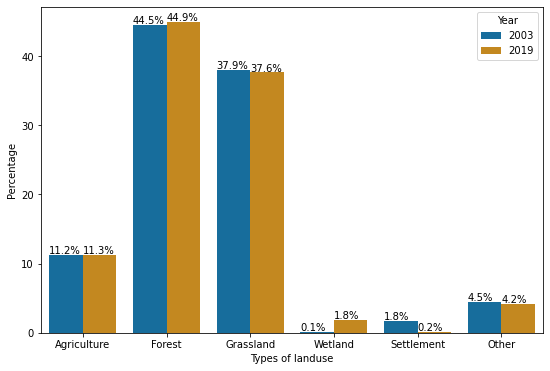

In [26]:
#plotting

import seaborn as sns
fig, ax = plt.subplots(figsize=(9,6))
sns.set_palette(sns.color_palette("colorblind"))
sns.barplot(x="types",y="percentage",hue="Year",data=bar_data,ax=ax)
plt.xlabel("Types of landuse")
plt.ylabel("Percentage")

total=len(bar_data['lucc_2003'])
for p in ax.patches:
    percentage1 ='{:,.1f}%'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+0.2
    ax.annotate(percentage1,(x,y))

widthbars = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]    
for bar, newwidth in zip(ax.patches, widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)
#plt.savefig("figures/barplot_final.jpg",dpi=150)
plt.show()

### leaf area index 

<ipython-input-27-929c4ee66a72>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])


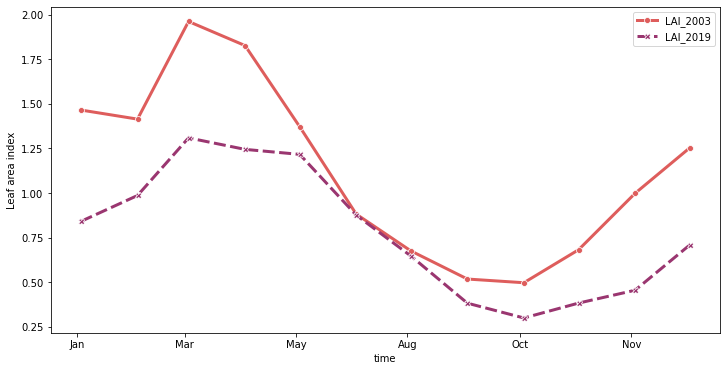

In [27]:
#reading files
la_03 = xr.open_dataset("LsAI_EX/LAI_SAf_2003.nc")
la_19 = xr.open_dataset("LsAI_EX/LAI_SAf_2019.nc")


la_2003 = la_03["LAI"][0:12,:,:].groupby("time").mean(["lat", "lon"])
#la_2019 = la_03["LAI"][12:24,:,:].groupby("time").mean(["lat", "lon"])
la_2019= la_19["LAI"][0:12,:,:].groupby("time").mean(["lat", "lon"])

#datafrme for plotting
LAI_df = la_2003.to_dataframe()
LAI_df["LAI_2019"]=la_2019[0:]


fig , ax = plt.subplots(figsize=(12, 6))
g=sns.lineplot(data=LAI_df,ax=ax,markers=True,linewidth = 3,palette = "flare")
g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])
plt.ylabel("Leaf area index")
#plt.xlabel([])
plt.legend(labels=["LAI_2003","LAI_2019"])
#plt.savefig("LAI.jpg",dpi=150)
plt.show()

### Fraction of Absorbed Photosynthetically Active Radiation:

<ipython-input-29-6b0900976c72>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])


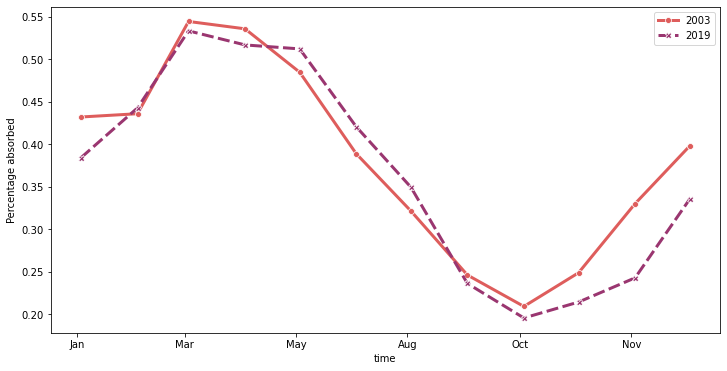

In [29]:
faPAR_03 = xr.open_dataset("LsAI_EX/faPAR_SAf_2003.nc")
faPAR_19 = xr.open_dataset("LsAI_EX/faPAR_SAf_2019.nc")

fa_2003 = faPAR_03["faPAR"][0:12,:,:].groupby("time").mean(["lat", "lon"])
#la_2019 = la_03["LAI"][12:24,:,:].groupby("time").mean(["lat", "lon"])
fa_2019= faPAR_19["faPAR"][0:12,:,:].groupby("time").mean(["lat", "lon"])

faPAR_df = fa_2003.to_dataframe()
faPAR_df["fa_2019"]=fa_2019[0:]

fig , ax = plt.subplots(figsize=(12, 6))
g=sns.lineplot(data=faPAR_df,ax=ax,markers=True,linewidth = 3,palette = "flare")
g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])
plt.ylabel("Percentage absorbed")
#plt.xlabel([])
plt.legend(labels=["2003","2019"])
#plt.savefig("faPAR.jpg",dpi=150)
plt.show()

### surface fluxes

<ipython-input-30-7efcecec08c5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])


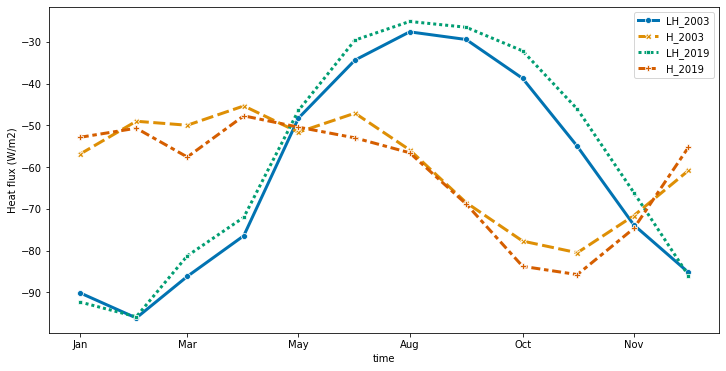

In [30]:
sf = xr.open_dataset("LsAI_EX/Sfc_SAf.nc")

lhf_2013 = sf["slhf"][0:12,:,:].groupby("time").mean(["latitude", "longitude"])/(24*3600)
lhf_2019 = sf["slhf"][12:24,:,:].groupby("time").mean(["latitude", "longitude"])/(24*3600)
shf_2013= sf["sshf"][0:12,:,:].groupby("time").mean(["latitude", "longitude"])/(24*3600)
shf_2019 = sf["sshf"][12:24,:,:].groupby("time").mean(["latitude", "longitude"])/(24*3600)

plot_data_2003=lhf_2013.to_dataframe()
plot_data_2003['shf']=  shf_2013[0:]
plot_data_2003['lhf_2019']=lhf_2019[0:]
plot_data_2003['shf_2019']=shf_2019[0:]

fig , ax = plt.subplots(figsize=(12, 6))
g=sns.lineplot(data=plot_data_2003,ax=ax,markers=True,linewidth = 3)
g.set(xticklabels=["Jan","Mar","May","Aug","Oct","Nov"])
plt.ylabel("Heat flux (W/m2)")
#plt.xlabel([])
plt.legend(labels=['LH_2003', 'H_2003',"LH_2019","H_2019"])
#plt.savefig("heatflux_all.jpg",dpi=150)
plt.show()

[Text(12.5, 0, ''),
 Text(15.0, 0, ''),
 Text(17.5, 0, ''),
 Text(20.0, 0, ''),
 Text(22.5, 0, ''),
 Text(25.0, 0, ''),
 Text(27.5, 0, ''),
 Text(30.0, 0, ''),
 Text(32.5, 0, ''),
 Text(35.0, 0, '')]

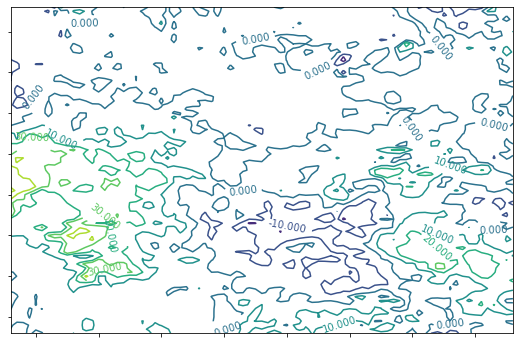

In [31]:
#surface flux changes contour plot
x=sf["slhf"].sel(time=slice('2019-01-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000')).mean("time")/(24*3600)
y=sf["slhf"].sel(time=slice('2003-01-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000')).mean("time")/(24*3600)
z=x-y
fig, ax = plt.subplots(figsize=(9,6))
CS = ax.contour(sf.longitude, sf.latitude,z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_yticklabels([])
ax.set_xticklabels([])
#plt.savefig("figures/surfacelatentflux_changes.jpg",dpi=150)